# Course CS 513-A: Knowledge Discovery and Data Mining 
# Professor Kasha Dehnad
# Group members: Arjun Patel, Kyle Graupe
Description: This project involves working with a dataset that contains information about financial risk for loan approval, and  our objectice is to use classification models to determine whether an applicant is likely to be approved or denied for a loan. The dataset contains diverse features such as demographic information, credit history, employment status, income levels, existing debt, and other relevant financial metrics, providing a comprehensive foundation for sophisticated data-driven analysis and decision-making. The dataset itself can be found here: 
https://www.kaggle.com/datasets/lorenzozoppelletto/financial-risk-for-loan-approval/data

In [2]:
# Libraries and packages 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

 # $\mathrm{I.}$ Exploratory Data Analysis (EDA)
 <center>Before we start to work with out data, we must observe our dataset and conduct preliminary analysis. This includes detecting and handling missing values,identifying any patterns within our data, visualizing our data, and overall preparation for further analysis through supervised machine learning and implementation of classification algorithms.

In [3]:
# Load in the Loan dataset, and observe the schema of our data 
df = pd.read_csv("Loan.csv")
df.head(10)

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.00,0.72,11,126928,0.20,0.23,419.81,0.18,0,49.00
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.08,0.94,3,43609,0.21,0.20,794.05,0.39,0,52.00
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.67,0.87,6,5205,0.22,0.21,666.41,0.46,0,52.00
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.00,0.90,5,99452,0.30,0.30,1047.51,0.31,0,54.00
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.33,0.94,5,227019,0.20,0.18,330.18,0.07,1,36.00
5,2018-01-06,37,178310,626,Self-Employed,Master,16,15433,72,Married,...,14859.17,0.76,5,27071,0.22,0.22,385.58,0.08,1,44.00
6,2018-01-07,58,51250,564,Employed,High School,39,12741,48,Married,...,4270.83,0.88,5,21730,0.23,0.21,391.30,0.17,0,50.00
7,2018-01-08,49,97345,516,Employed,High School,23,19634,12,Divorced,...,8112.08,0.93,5,38621,0.23,0.21,1827.36,0.26,1,42.40
8,2018-01-09,34,116841,603,Employed,Bachelor,12,55353,60,Divorced,...,9736.75,0.73,3,7711,0.26,0.29,1762.20,0.25,0,61.00
9,2018-01-10,46,40615,612,Employed,Associate,19,25443,12,Married,...,3384.58,0.62,3,116812,0.18,0.20,2353.58,0.90,0,53.00


In [4]:
# We can also observe the types for the data within the attributes of our dataset
print(df.dtypes)

ApplicationDate                object
Age                             int64
AnnualIncome                    int64
CreditScore                     int64
EmploymentStatus               object
EducationLevel                 object
Experience                      int64
LoanAmount                      int64
LoanDuration                    int64
MaritalStatus                  object
NumberOfDependents              int64
HomeOwnershipStatus            object
MonthlyDebtPayments             int64
CreditCardUtilizationRate     float64
NumberOfOpenCreditLines         int64
NumberOfCreditInquiries         int64
DebtToIncomeRatio             float64
BankruptcyHistory               int64
LoanPurpose                    object
PreviousLoanDefaults            int64
PaymentHistory                  int64
LengthOfCreditHistory           int64
SavingsAccountBalance           int64
CheckingAccountBalance          int64
TotalAssets                     int64
TotalLiabilities                int64
MonthlyIncom

In [5]:
# Summary statistics for our data 
# Compute the minimum, maximum, and mean of each numeric column
# Summarize each column
summary = df.describe()

# Print the summary
print(summary)

print('\n min, max, mean only')
# Min_Max_Mean=df.describe(include=[float, int]).loc[["min", "max", "mean"]]
Min_Max_Mean=df.describe().loc[["min", "max", "mean"]]
print(Min_Max_Mean)

           Age  AnnualIncome  CreditScore  Experience  LoanAmount  \
count 20000.00      20000.00     20000.00    20000.00    20000.00   
mean     39.75      59161.47       571.61       17.52    24882.87   
std      11.62      40350.85        51.00       11.32    13427.42   
min      18.00      15000.00       343.00        0.00     3674.00   
25%      32.00      31679.00       540.00        9.00    15575.00   
50%      40.00      48566.00       578.00       17.00    21914.50   
75%      48.00      74391.00       609.00       25.00    30835.00   
max      80.00     485341.00       712.00       61.00   184732.00   

       LoanDuration  NumberOfDependents  MonthlyDebtPayments  \
count      20000.00            20000.00             20000.00   
mean          54.06                1.52               454.29   
std           24.66                1.39               240.51   
min           12.00                0.00                50.00   
25%           36.00                0.00               286.

In [6]:
# We also should check if our dataset contains any missing values 
print(df[df.isna().any(axis=1)]) # show the na in the data frame
# print(df.isnull())
missing_values =df.isnull().sum()
print(missing_values)
# We can see that there are no missing values, and there is no need to replace our data with the mean, or median values of respective columns

Empty DataFrame
Columns: [ApplicationDate, Age, AnnualIncome, CreditScore, EmploymentStatus, EducationLevel, Experience, LoanAmount, LoanDuration, MaritalStatus, NumberOfDependents, HomeOwnershipStatus, MonthlyDebtPayments, CreditCardUtilizationRate, NumberOfOpenCreditLines, NumberOfCreditInquiries, DebtToIncomeRatio, BankruptcyHistory, LoanPurpose, PreviousLoanDefaults, PaymentHistory, LengthOfCreditHistory, SavingsAccountBalance, CheckingAccountBalance, TotalAssets, TotalLiabilities, MonthlyIncome, UtilityBillsPaymentHistory, JobTenure, NetWorth, BaseInterestRate, InterestRate, MonthlyLoanPayment, TotalDebtToIncomeRatio, LoanApproved, RiskScore]
Index: []

[0 rows x 36 columns]
ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus          

EmploymentStatus
Employed        0.24
Self-Employed   0.28
Unemployed      0.18
Name: LoanApproved, dtype: float64


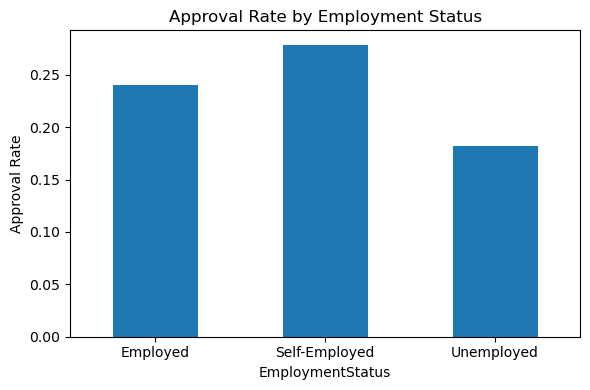

In [7]:
# Compute approval rate by EmploymentStatus
approval_rates = df.groupby('EmploymentStatus')['LoanApproved'].mean().reindex([
    'Employed', 'Self-Employed', 'Unemployed'
])
print(approval_rates)
# Plot
plt.figure(figsize=(6, 4))
approval_rates.plot(kind='bar')
plt.ylabel('Approval Rate')
plt.title('Approval Rate by Employment Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [8]:
# Attribute modifications

# First, we can convert the ApplicationDate column from plain text (strings/object) to datetime64 data type to extract the year, month, and day
# Convert ApplicationDate to datetime and extract year/month/day
df['ApplicationDate'] = pd.to_datetime(df['ApplicationDate'])
df['AppYear']  = df['ApplicationDate'].dt.year
df['AppMonth'] = df['ApplicationDate'].dt.month
df['AppDay']   = df['ApplicationDate'].dt.day
# Drop the original date column
df.drop('ApplicationDate', axis=1, inplace=True)
#print(df[['AppYear', 'AppMonth', 'AppDay']].head(20))
#print(df.dtypes)

# Round the existing column to 2 decimal places in‑place (some scores within the column would take the form "42.40000000000000"0")
df['RiskScore'] = df['RiskScore'].round(2)
#print(df[['RiskScore']].head(20))
# Same can be said for BaseInterestRate
df['BaseInterestRate'] = df['BaseInterestRate'].round(7)
#print(df[['BaseInterestRate']].head(20))
# Same can be done for MonthlyIncome
df['MonthlyIncome'] = df['MonthlyIncome'].round(3)
#print(df[['MonthlyIncome']].head(20))

# Now, to handle attributes that are non-numeric, we use one-hot ecoding for EmployemtStatus, EducationLevel, MaritalStatus, HomeOwnershipStatus, LoanPurpose
# Since these columns are type "object," one hot encoding can help so that we do not have to simply drop important attributes within the dataset 
# **Note** that one hot encoding will make the dataset more sparse, meaning that most of the entires on your new columns are zeros, so the resulting matrix is said to be sparse
# RO prevent multicolinearity, we can also drop newly created features as a result of the one hot encoding 

# EmploymentStatus (baseline being dropped: Employed)
df = pd.get_dummies(
    df,
    columns=['EmploymentStatus'],
    prefix='Emp',
    drop_first=True
)
# EducationLevel (baseline being dropped: Associate)
df = pd.get_dummies(
    df,
    columns=['EducationLevel'],
    prefix='Edu',
    drop_first=True
)
# MaritalStatus (baseline being dropped: Married)
df = pd.get_dummies(
    df,
    columns=['MaritalStatus'],
    prefix='Marital',
    drop_first=True
)
# HomeOwnershipStatus (baseline being dropped: Own)
df = pd.get_dummies(
    df,
    columns=['HomeOwnershipStatus'],
    prefix='HomeOwn',
    drop_first=True
)
# Finally, LoanPurpose (dropping the first category (alphabetically "Auto") as baseline
df = pd.get_dummies(
    df,
    columns=['LoanPurpose'],
    prefix='Purpose',
    drop_first=True
)
# Verify our results
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         20000 non-null  int64  
 1   AnnualIncome                20000 non-null  int64  
 2   CreditScore                 20000 non-null  int64  
 3   Experience                  20000 non-null  int64  
 4   LoanAmount                  20000 non-null  int64  
 5   LoanDuration                20000 non-null  int64  
 6   NumberOfDependents          20000 non-null  int64  
 7   MonthlyDebtPayments         20000 non-null  int64  
 8   CreditCardUtilizationRate   20000 non-null  float64
 9   NumberOfOpenCreditLines     20000 non-null  int64  
 10  NumberOfCreditInquiries     20000 non-null  int64  
 11  DebtToIncomeRatio           20000 non-null  float64
 12  BankruptcyHistory           20000 non-null  int64  
 13  PreviousLoanDefaults        200

In [9]:
# We can check to see if there is a large imbalance within loan approvals
df['LoanApproved'].value_counts()
# As we can see, there is a clear imbalance
# When using our classification models, we can use metrics like F1‑score or ROC‑AUC, and either resample or use class weights

0    15220
1     4780
Name: LoanApproved, dtype: int64

<Axes: xlabel='CreditScore', ylabel='Density'>

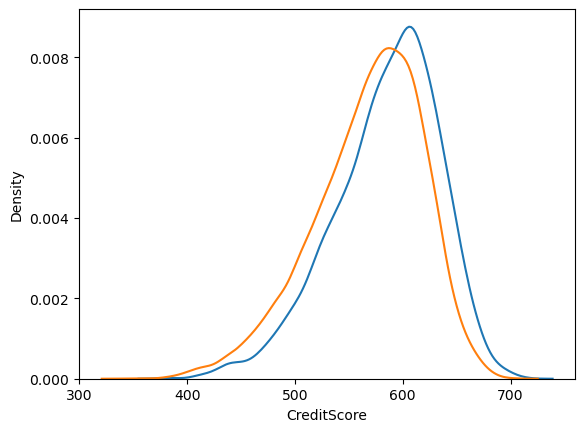

In [10]:
# Compare CreditScore distributions for approved vs. denied
sns.kdeplot(df.loc[df.LoanApproved==1, 'CreditScore'], label='Approved')
sns.kdeplot(df.loc[df.LoanApproved==0, 'CreditScore'], label='Denied')

In [11]:
# Let's observe which numeric features are most positively or negatively associated with approval
corr = df.select_dtypes('number').corr()['LoanApproved'].sort_values()
print(corr)

RiskScore                    -0.77
TotalDebtToIncomeRatio       -0.41
InterestRate                 -0.30
BaseInterestRate             -0.25
LoanAmount                   -0.24
MonthlyLoanPayment           -0.18
Edu_High School              -0.14
LoanDuration                 -0.09
BankruptcyHistory            -0.07
MonthlyDebtPayments          -0.07
PreviousLoanDefaults         -0.07
Emp_Unemployed               -0.04
TotalLiabilities             -0.03
HomeOwn_Other                -0.03
HomeOwn_Rent                 -0.02
Purpose_Other                -0.01
AppMonth                     -0.01
CreditCardUtilizationRate    -0.01
Marital_Widowed              -0.01
NumberOfCreditInquiries      -0.01
AppYear                      -0.01
Purpose_Debt Consolidation   -0.01
NumberOfOpenCreditLines      -0.00
Purpose_Home                 -0.00
Marital_Married              -0.00
AppDay                       -0.00
DebtToIncomeRatio             0.00
Marital_Single                0.00
CheckingAccountBalan

Text(0.5, 1.0, 'Top Correlates with Approval')

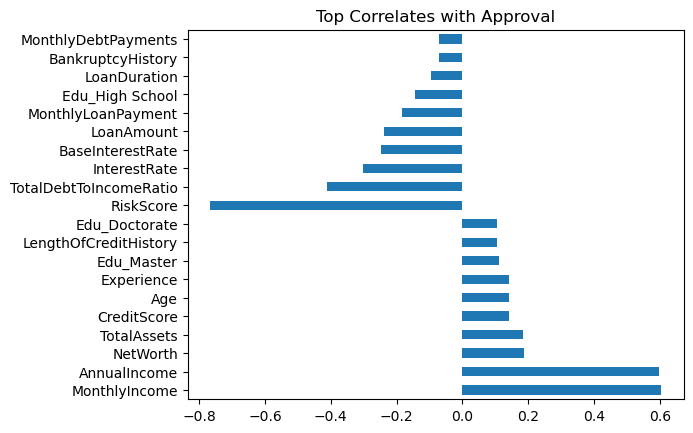

In [12]:
# We can use a bar chart to visualize correlations 
corrs = df.corr()['LoanApproved'].drop('LoanApproved')
top = pd.concat([corrs.nlargest(10), corrs.nsmallest(10)])
top.plot(kind='barh')
plt.title('Top Correlates with Approval')

<Axes: xlabel='AppYear'>

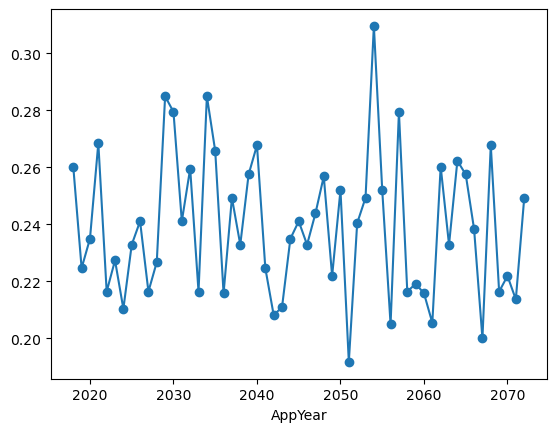

In [13]:
# Visualize loan approval by year
df.groupby('AppYear')['LoanApproved'].mean().plot(marker='o')
# We can see there is significant noise, and we may consider dropping this attribute or handling this in another way


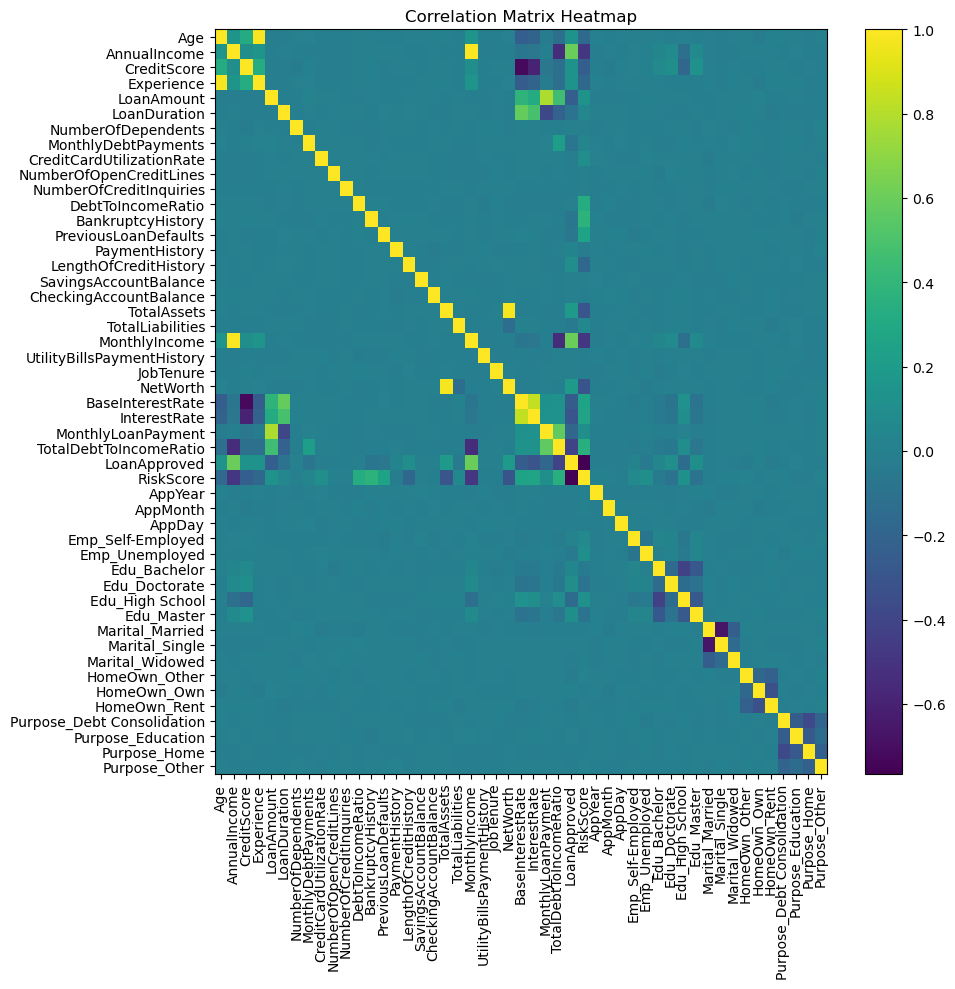

In [14]:
# Plot heatmap to visually see which attrubutes might be correlated
numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 10))
plt.imshow(corr_matrix, aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

In [15]:
# VIF for multicolinearity check (dropped crediscore, riskscore)

df_model = df.drop(columns=['RiskScore', 'InterestRate', 'CreditScore'])

features = [
    'Age',
    'AnnualIncome',
    'LoanAmount',
    'DebtToIncomeRatio'
]

X = df_model[features]

# 4) Compute VIF for each feature
vif = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    index=features
)
print("Final VIFs (should all be < 10):")
print(vif)


Final VIFs (should all be < 10):
Age                 6.26
AnnualIncome        3.06
LoanAmount          3.65
DebtToIncomeRatio   3.53
dtype: float64


# $\mathrm{Ⅱ.}$ Pre-model Analysis
<center> Now that we have completed the EDA portion, we can look closer at which models we choose to implement. We can take an initial glace by using lazyclassifer in python to determin which models might yield good performance. 

In [16]:
df_numeric = df.select_dtypes(include=['int64','float64'])

# 2) Define X (features) and y (target)
X = df_numeric.drop(columns=['LoanApproved'])
y = df_numeric['LoanApproved']

# 3) Split into train/test, preserving class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

In [187]:
#pip install lazypredict

In [1]:
import numpy as np
import io
from contextlib import redirect_stdout

# 1) Monkey‐patch numpy.show_config to return a string instead of None
def _show_config_str():
    buf = io.StringIO()
    with redirect_stdout(buf):
        # call the real backend‐dumper
        np.__orig_show_config__()
    return buf.getvalue()

# keep a reference to the original for use inside our shim
np.__orig_show_config__ = np.show_config
np.show_config = _show_config_str

# 2) Now import and use LazyClassifier safely
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=1, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)


AttributeError: 'NoneType' object has no attribute 'split'